In [219]:
from sklearn import tree 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Работа с первыми данными 

In [220]:
df = pd.read_csv("./Data/training_mush.csv")

In [221]:
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [222]:
X = df.drop(columns="class")
y = df["class"]


In [223]:
parametrs = {"n_estimators": range(10, 50, 10), 
            "max_depth": range(1, 12, 2),
            "min_samples_leaf": range(1, 7),
            "min_samples_split": range(2, 9, 2)}

In [224]:
clf = RandomForestClassifier()

In [225]:
grid_search_clf = GridSearchCV(clf, param_grid=parametrs, cv=3, n_jobs=-1)

In [226]:
grid_search_clf.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

In [227]:
clf = grid_search_clf.best_estimator_

<Axes: >

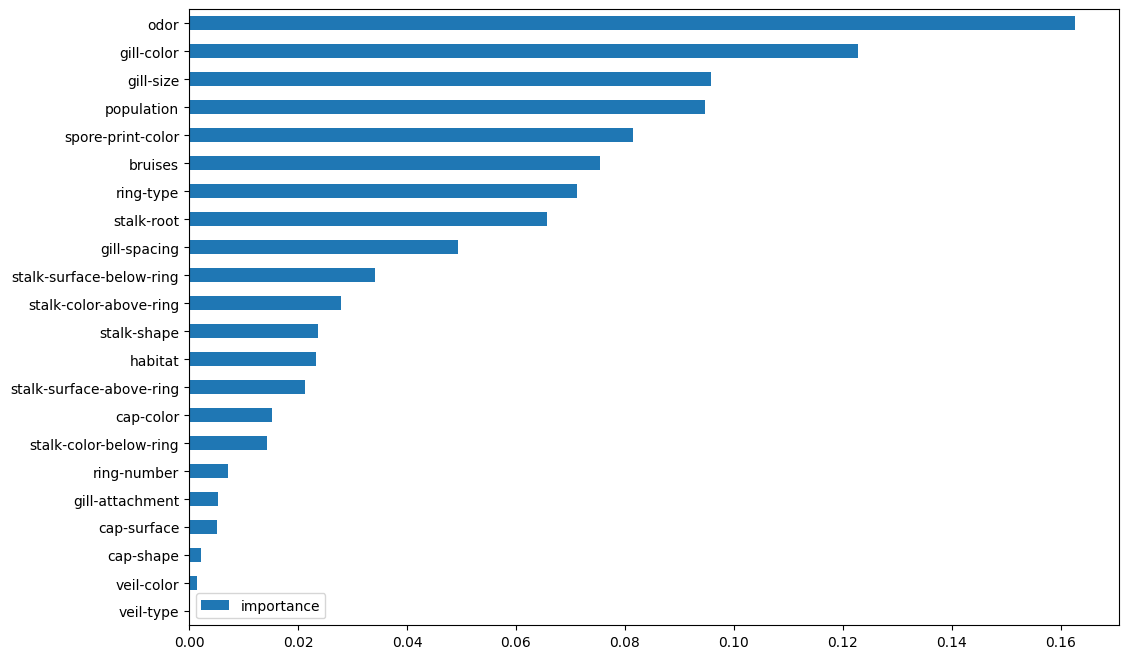

In [228]:
imp = pd.DataFrame(clf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))


In [229]:
df_test = pd.read_csv("./Data/testing_mush.csv")

In [230]:
y_pred = clf.predict(df_test)

In [231]:
y_true = pd.read_csv("./Data/testing_y_mush.csv")

<Axes: >

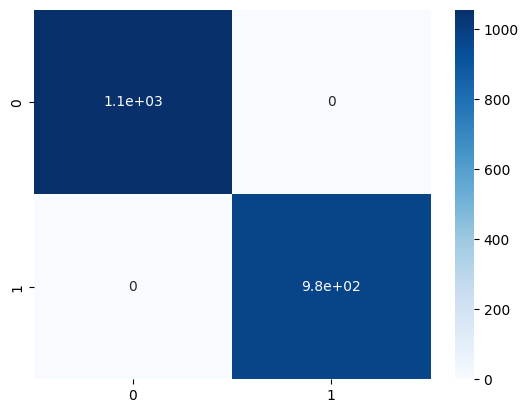

In [232]:
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap="Blues")

# Работа со вторыми данными

In [233]:
data_2 = pd.read_csv("./Data/invasion.csv")

In [234]:
data_2.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [246]:
transport = {'transport' :  0,  'fighter' :  1,  'cruiser' : 2}
y_train = data_2['class'].map(transport)
X_train = data_2.drop(columns="class")

In [242]:
parametrs = {"n_estimators": range(10, 50, 10), 
            "max_depth": range(1, 12, 2),
            "min_samples_leaf": range(1, 7),
            "min_samples_split": range(2, 9, 2)}


In [243]:
clf = RandomForestClassifier()


In [244]:
grid_search_clf = GridSearchCV(clf, param_grid=parametrs, cv=3, n_jobs=-1)

In [247]:
grid_search_clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

In [248]:
clf_best_estimator = grid_search_clf.best_estimator_

In [249]:
clf_best_estimator.score(X_train, y_train)

1.0

In [250]:
data_test_2 = pd.read_csv("./Data/operative_information.csv")

In [254]:
np.unique(clf_best_estimator.predict(data_test_2), return_counts=1)

(array([0, 1, 2]), array([593, 675, 232]))

<Axes: >

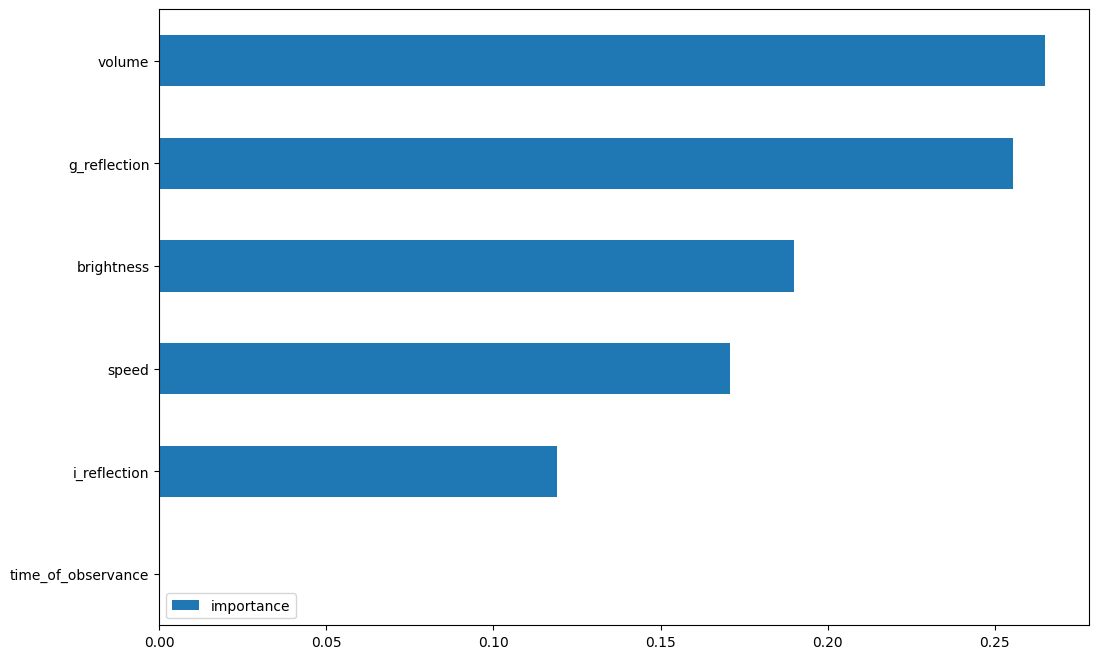

In [257]:
imp = pd.DataFrame(clf_best_estimator.feature_importances_, index=data_test_2.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))


In [264]:
df = pd.DataFrame(range(10000000))
%time df.apply(np.mean)


CPU times: user 10.1 ms, sys: 7.89 ms, total: 18 ms
Wall time: 19.5 ms


0    4999999.5
dtype: float64

In [262]:
%time df.mean(axis=0)


CPU times: user 12.5 ms, sys: 14.6 ms, total: 27.1 ms
Wall time: 26.5 ms


0    4999999.5
dtype: float64

In [263]:
%time df.apply('mean')


CPU times: user 11.5 ms, sys: 40.1 ms, total: 51.6 ms
Wall time: 61.2 ms


0    4999999.5
dtype: float64

In [265]:
%time df.describe().loc['mean']


CPU times: user 100 ms, sys: 79.8 ms, total: 180 ms
Wall time: 226 ms


0    4999999.5
Name: mean, dtype: float64